# Sentiment Analysis on News Title about Neurodivergence

In [7]:
import json
from pprint import pprint
import pandas as pd

# Opening JSON file
with open('articles_new/json_articles_autism_sentiment.json', 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)

l = [dict(item, **{'neurodivergence':'autism'}) for item in json_object]


# Opening JSON file
with open('articles_new/json_articles_bipolar_sentiment.json', 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)

l.extend([dict(item, **{'neurodivergence':'bipolar'}) for item in json_object])


# Opening JSON file
with open('articles_new/json_articles_intellectual_disability_sentiment.json', 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)

l.extend([dict(item, **{'neurodivergence':'intellectual_disability'}) for item in json_object])


# Opening JSON file
with open('articles_new/json_articles_ptsd_sentiment.json', 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)

l.extend([dict(item, **{'neurodivergence':'ptsd'}) for item in json_object])


# Opening JSON file
with open('articles_new/json_articles_schizophrenia_sentiment.json', 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)

l.extend([dict(item, **{'neurodivergence':'schizophrenia'}) for item in json_object])



df = pd.DataFrame.from_dict(l)
print(df.head())

# Assuming df is your DataFrame
journal_entries = df['journal'].unique().tolist()
# Define the file path where you want to save the text file
file_path = "journal_entries.txt"

# Write the journal entries to the text file
with open(file_path, "w") as f:
    for entry in journal_entries:
        f.write(entry + "\n")

                                               title               journal  \
0  DESPITE CONTROVERSY, SCHOOL SUCCEEDS WITH AUTI...      The Boston Globe   
1  Arts: Fine performers in search of a ballet - ...       Financial Times   
2  TO SOME, IT IS A MIRACLE WORKER HIGASHI SCHOOL...      The Boston Globe   
3                   Rules increase help for disabled  St. Petersburg Times   
4  Freeing Aid To Disabled Youngsters;New Rules M...   The Washington Post   

   year                                            opening     label  \
0  1990  Boxing gloves on her hands, a helmet on her he...  negative   
1  1990  'Remember not past years' enjoined Cardinal Ne...   neutral   
2  1990  LEXINGTON - One day in 1987, 4-year-old Katy R...  negative   
3  1990  Sometimes the system works -  even if in fits ...   neutral   
4  1990  Sometimes the system works - even if in fits a...   neutral   

      score neurodivergence  
0  0.997071          autism  
1  0.899480          autism  
2  0.904

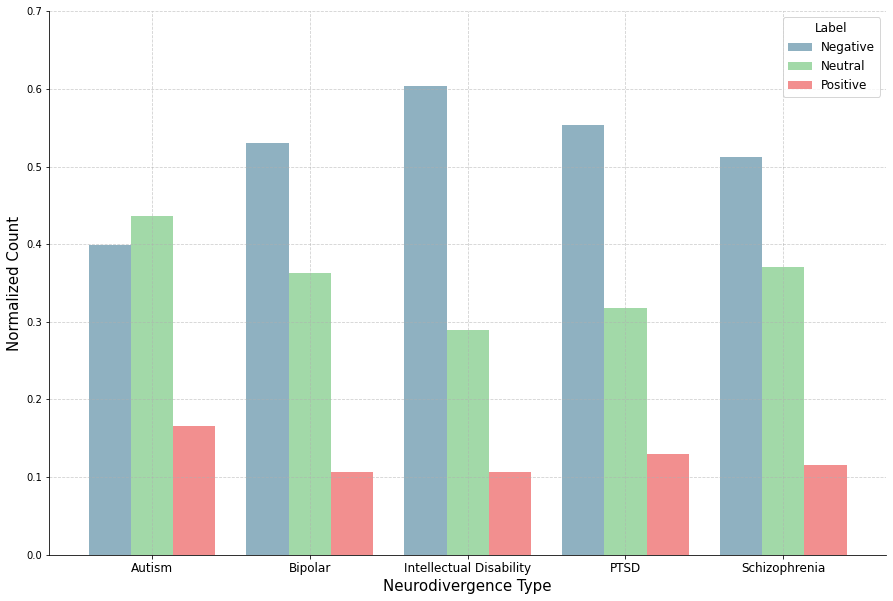

In [27]:
import matplotlib.pyplot as plt

# set the color scheme for the plot
colors = ['#8fb1c1', '#a2d9a8', '#f28f8f']

# get the total number of items in each neurodivergence
total_items = df.groupby(['neurodivergence']).size()

# group the dataframe by neurodivergence and label, and get the count of each group
counts = df.groupby(['neurodivergence', 'label']).size().unstack()

# normalize the counts by dividing by the total number of items in each neurodivergence
counts = counts.div(total_items, axis=0)

# update the index labels
counts.index = counts.index.str.title().str.replace('Intellectual_Disability', 'Intellectual disability')
counts.index = counts.index.str.title().str.replace('Ptsd', 'PTSD')

# create a grouped bar plot of the normalized counts
fig, ax = plt.subplots(figsize=(15, 10))
counts.plot(kind='bar', width=0.8, color=colors, ax=ax)

# set the plot title and axis labels
ax.set_xlabel('Neurodivergence Type', fontsize=15)
ax.set_ylabel('Normalized Count', fontsize=15)

# set the legend with capitalized labels
legend_labels = [label.capitalize() for label in counts.columns]
ax.legend(legend_labels, title='Label', fontsize=12, title_fontsize=12)

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add labels to the bars
for i, label in enumerate(list(counts.index)):
    ax.annotate(f'{total_items[i]} items', (i, 1), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=10)

# set the x-axis tick labels to be horizontal and change the font size
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_ylim(0, 0.7)
# show the plot
plt.show()

#save the plot to a file as a pdf
fig.savefig('neurodivergence_label_plot.pdf', bbox_inches='tight', dpi=300)


/tmp/ipykernel_6047/3742428059.py:15: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  total_items = counts.sum(level='neurodivergence')


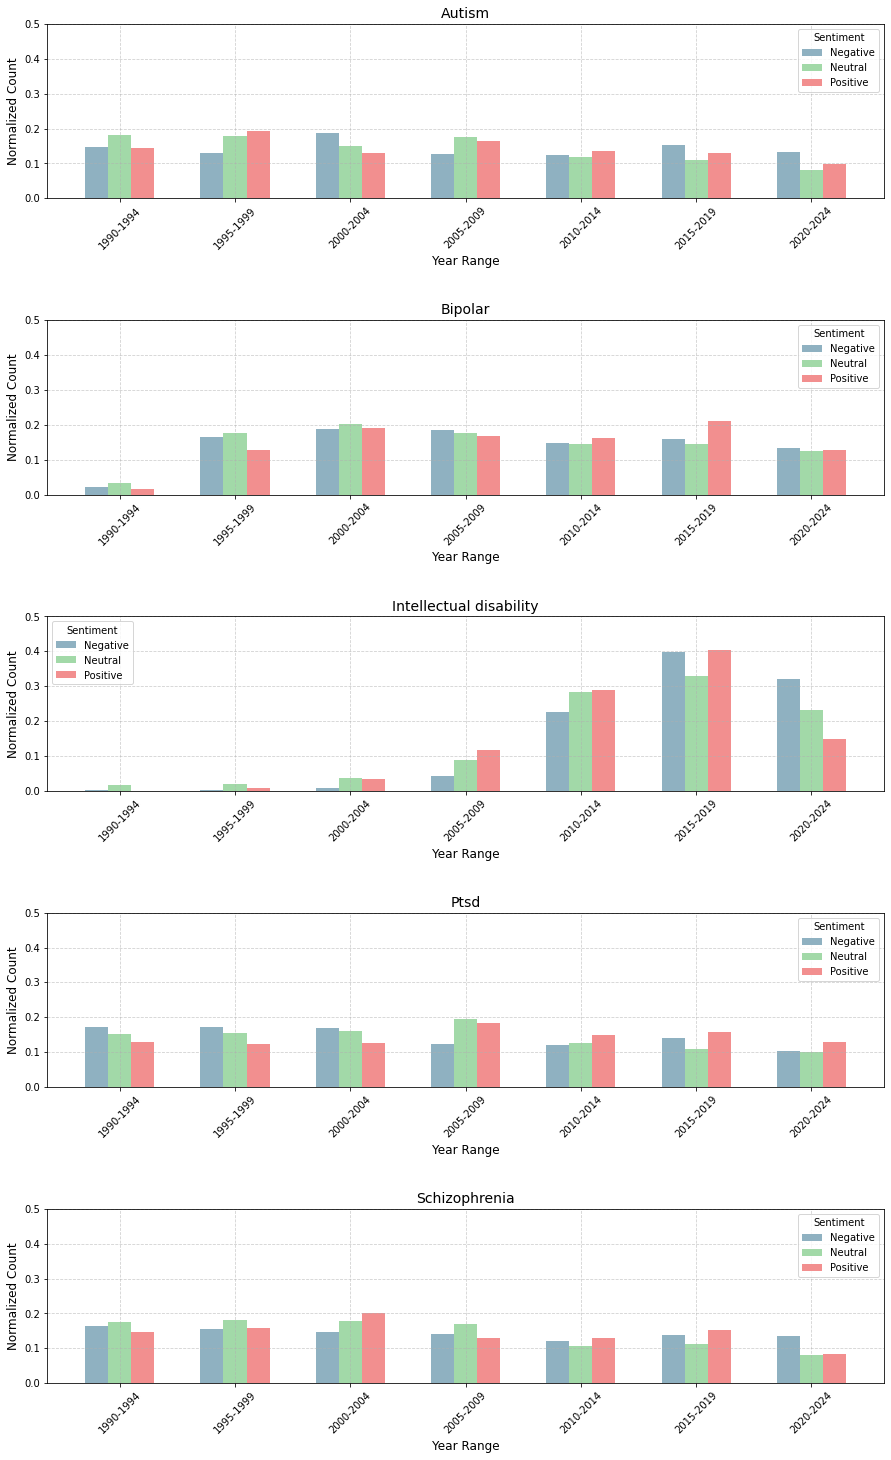

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color scheme for the plot
colors = [ '#8fb1c1', '#a2d9a8', '#f28f8f']
df['year'] = df['year'].astype(int)

# Define the year ranges
year_ranges = [(1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2024)]

# Group the dataframe by neurodivergence and label, and get the count of each group
counts = df.groupby(['neurodivergence', pd.cut(df['year'], bins=np.arange(1990, 2026, 5)), 'label']).size().unstack(fill_value=0)

# Normalize the counts by dividing by the total number of items in each neurodivergence
total_items = counts.sum(level='neurodivergence')
counts = counts.div(total_items, axis=0)

# Update the index labels
counts.index = counts.index.set_levels(counts.index.levels[0].str.title().str.replace('Intellectual_Disability', 'Intellectual disability').str.replace('Ptsd', 'PTSD'), level=0)

# Create subplots for each neurodivergence
fig, axes = plt.subplots(nrows=len(counts.index.levels[0]), ncols=1, figsize=(15, 25))

# Iterate over each neurodivergence
for ax, (neurodivergence, data) in zip(axes, counts.groupby(level='neurodivergence')):
    # Create histograms for each sentiment category
    for sentiment, color in zip(['negative', 'neutral', 'positive'], colors):  # Change the order here
        ax.bar(np.arange(len(year_ranges)) + 0.2 * (colors.index(color) - 1),
               data[sentiment].values, width=0.2, color=color, label=sentiment.capitalize())

    ax.set_title(neurodivergence.capitalize(), fontsize=14)  # Set the title without "Neurodivergence: "
    ax.set_xlabel('Year Range', fontsize=12)
    ax.set_ylabel('Normalized Count', fontsize=12)
    ax.set_xticks(np.arange(len(year_ranges)))
    ax.set_xticklabels([f'{range[0]}-{range[1]}' for range in year_ranges], rotation=45)
    ax.set_ylim(0, 0.5)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(title='Sentiment', fontsize=10, title_fontsize=10)
    # ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.subplots_adjust(hspace=0.7)  # Increase space between subplots
plt.savefig('neurodivergence_sentiment_histograms.pdf', bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
top_scores = pd.concat([
    df.groupby(['neurodivergence', 'label'])
      .apply(lambda x: x.sort_values('score', ascending=False).head(10))
    for label in ['positive', 'negative', 'neutral']
])

print(top_scores)

#save the df to csv
top_scores.to_csv('top_scores.csv', index=False)

                                                                            title  \
neurodivergence label                                                               
autism          negative 2771   Mass murderer was autistic, not misogynist, cl...   
                         3067   2 parents sue district over child's pronouns; ...   
                         2681   Texas speech pathologist loses job for refusin...   
                         2940   Julia Hartley-Brewer accused of using ‘autisti...   
                         2529   NYCHA let kids live in homes they knew were to...   
...                                                                           ...   
schizophrenia   positive 12524  Friday’s best TV: NCIS; An Island Parish: Falk...   
                         11777       Eli Lilly Said To Play Down Risk of Top Pill   
                         11420  How to Fix Your Life in 2004 --- Rethinking Yo...   
                         13023  A Proper Burial for the Lost Chil

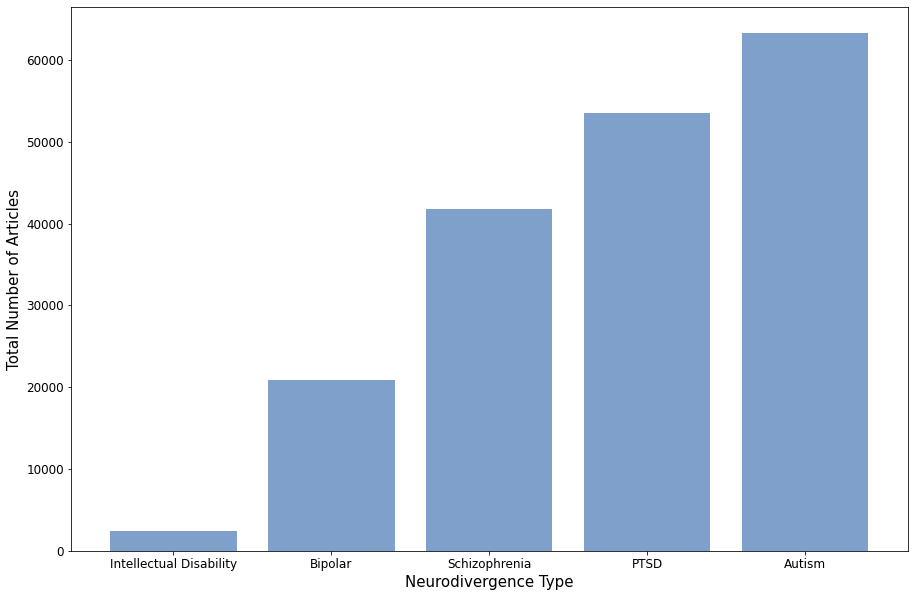

In [29]:
# dict for total number of articles per neurodivergence type
# neurodivergence_total_articles = {'autism': 57278, 'bipolar': 20930, 'intellectual_disability':5560, 'ptsd':59680, 'schizophrenia':36916}

# NEW
neurodivergence_total_articles = {'autism':63286, 'bipolar':20852, 'intellectual_disability':2447, 'ptsd': 53479, 'schizophrenia':41723}
# neurdivergence total articles for years from 1990 to 2024 and per neurodivergence type
neurodivergence_total_articles_yearly = {'autism':[80, 103, 106, 125, 155, 166, 153, 260, 391, 462, 507, 1070, 1336, 1177, 1253, 1261, 1338, 1628, 1570, 1841, 1807, 1780, 2081, 3191, 2914, 3440, 4289, 4335, 3955, 4455, 3321, 3424, 3070, 4266, 1644], 'bipolar':[5, 3, 7, 19, 18, 18, 43, 83, 100, 142, 157, 224, 317, 330, 445, 389, 537, 567, 670, 670, 601, 671, 820, 1390, 1286, 1289, 1449, 1173, 1404, 1102, 1011, 971, 1207, 1156, 478], 'intellectual_disability':[0, 1, 0, 3, 2, 0, 1, 1, 2, 2, 2, 6, 2, 1, 3, 10, 5, 11, 18, 7, 34, 31, 58, 122, 216, 167, 233, 229, 176, 223, 154,235, 203, 199, 83], 'ptsd':[97, 162, 132, 134, 165, 237, 248, 247, 275, 259, 331, 455, 486, 462, 464, 526, 602, 914, 794, 866, 900, 1036, 1390, 2266, 2735, 2705, 3638, 3756, 4609, 4003, 3533, 4300, 4349, 4445, 1514], 'schizophrenia':[426, 364, 386, 452, 492, 541, 607, 738, 860, 896, 916, 1119, 1446, 1058, 978, 1080, 1067, 1176, 1130, 1048, 893, 963, 1310, 2114, 1970, 1997, 2140, 1925, 1528, 1624, 1134, 1248, 1498, 1614,860]}
# plot the total number of articles per neurodivergence type and sort in descending order
fig, ax = plt.subplots(figsize=(15, 10))
neurodivergence_total_articles_sorted = pd.Series(neurodivergence_total_articles).sort_values(ascending=True)
neurodivergence_total_articles_sorted.plot(kind='bar', width=0.8, color=["#80a0cc"], ax=ax)
ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# set the plot title and axis labels
ax.set_xlabel('Neurodivergence Type', fontsize=15)
ax.set_ylabel('Total Number of Articles', fontsize=15)

# modify x-axis tick labels
tick_labels = [label.capitalize() for label in neurodivergence_total_articles_sorted.index]
tick_labels[0] = 'Intellectual Disability'
tick_labels[3] = 'PTSD'
ax.set_xticklabels(tick_labels)

#save the plot to a file as a jpeg
fig.savefig('neurodivergence_total_articles.pdf', bbox_inches='tight', dpi=300)

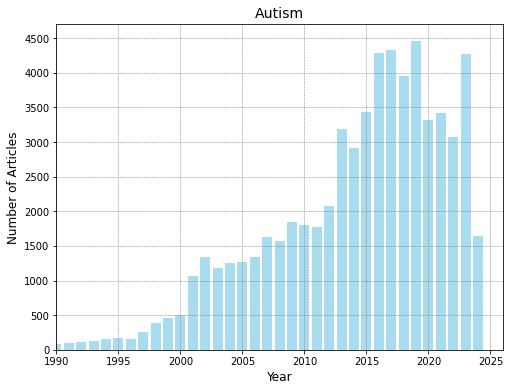

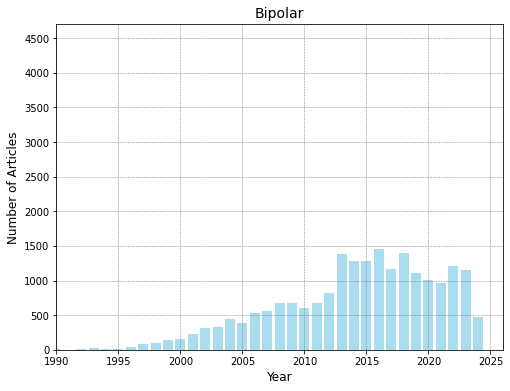

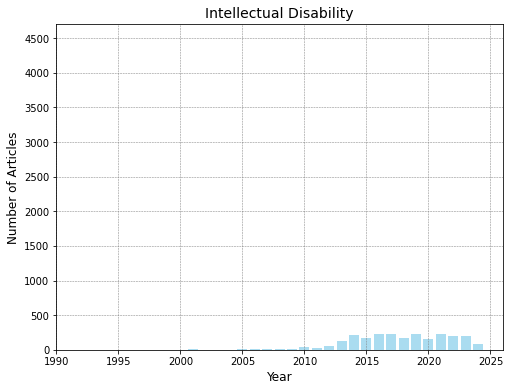

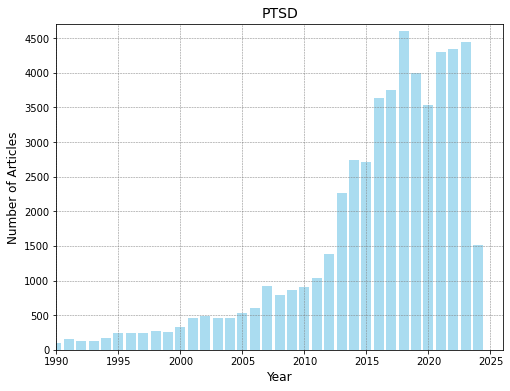

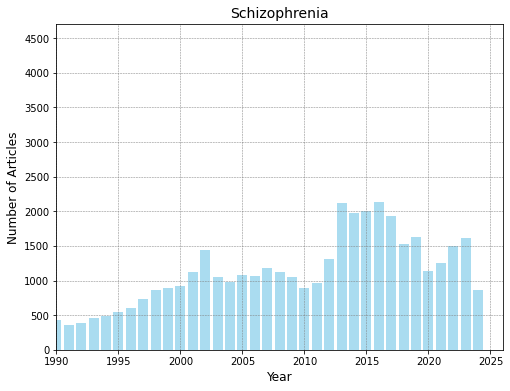

In [30]:

# Get the maximum number of articles across all neurodivergence types
max_articles = max(max(data) for data in neurodivergence_total_articles_yearly.values())

# Plot histograms for articles per year for each neurodivergence type
for neurodivergence, data in neurodivergence_total_articles_yearly.items():
    plt.figure(figsize=(8, 6))
    plt.bar(range(1990, 2025), data, color='skyblue', alpha=0.7)
    if neurodivergence == "ptsd":
        plt.title("PTSD", fontsize=14)
    elif neurodivergence == "intellectual_disability":
        plt.title("Intellectual Disability", fontsize=14)
    else:
        plt.title(neurodivergence.capitalize(), fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.xlim(1990, 2026)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.yticks(range(0, max_articles+100, 500))
    plt.ylim(0, max_articles+100)  # Set the same scale for y-axis
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.savefig(f'neurodivergence_{neurodivergence}_articles_per_year_histogram.pdf', dpi=300)
    plt.show()

# Analysis of Movies

In [ ]:
# import necessary libraries
import pandas as pd

# Import csv file in movies/neurodivergence.csv
df = pd.read_csv('movies/neurodivergence.csv')

# Create a new dataframe with the years expanded
expanded_years = pd.concat([pd.DataFrame({'Movie/Show Title': row['Movie/Show Title'], 'Type': row['Type'], 'Genre': row['Genre'], 'Neurodivergence Portrayed': row['Neurodivergence Portrayed'], 'Role': row['Role'], 'Gender of the neurodivergent character': row['Gender of the neurodivergent character'], 'Rating': row['Rating'], 'Year': range(int(row['Year'].split('-')[0]), int(row['Year'].split('-')[1])+1)}) if '-' in row['Year'] else pd.DataFrame({'Movie/Show Title': [row['Movie/Show Title']], 'Type': [row['Type']], 'Genre': [row['Genre']], 'Neurodivergence Portrayed': [row['Neurodivergence Portrayed']], 'Role': [row['Role']], 'Gender of the neurodivergent character': [row['Gender of the neurodivergent character']], 'Rating': [row['Rating']], 'Year': [row['Year']]}) for _, row in df.iterrows()])

# Merge the expanded years dataframe with the original dataframe
df_expanded_years = pd.merge(df, expanded_years, on=['Movie/Show Title', 'Year'], how='right')

# Drop the '_x' suffixed columns and keep only the '_y' suffixed columns and the 'Movie/Show Title' column
df_expanded_years= df_expanded_years.filter(regex='^(Movie/Show Title|Year|.*_y)$')


# Remove the '_y' suffix from all column names
df_expanded_years = df_expanded_years.rename(columns=lambda x: x.replace('_y', ''))

df_expanded_years['Genre'] = df_expanded_years['Genre'].str.split(' ')
df_expanded_years['Neurodivergence Portrayed'] = df_expanded_years['Neurodivergence Portrayed'].str.split(',')
df_expanded_years['Rating'] = df_expanded_years['Rating'].str.replace(',', '.')

df['Genre'] = df['Genre'].str.split(' ')
df['Neurodivergence Portrayed'] = df['Neurodivergence Portrayed'].str.split(',')
df['Rating'] = df['Rating'].str.replace(',', '.')

df.head(30)
df_expanded_years.head(30)

,Movie/Show Title,Year,Type,Genre,Neurodivergence Portrayed,Role,Gender of the neurodivergent character,Rating
0,Everything’s Gonna Be Okay,2020,Show,"[Comedy, Drama]",[Autism Spectrum],Main,Female,7.4
1,Lady Dynamite,2016,Show,[Comedy],"[OCD, Bipolar Disorder]",Main,Female,7.4
2,Ozark,2017,Show,"[Crime, Drama, Thriller]",[Down Syndrome],Side,Male,8.5
3,I am Sam,2001,Movie,[Drama],[Intellectual Disability],Main,Male,7.6
4,The Bridge,2011,Show,"[Crime, Mystery, Thriller]",[Autism Spectrum],Main,Female,8.6
5,The Bridge,2012,Show,"[Crime, Mystery, Thriller]",[Autism Spectrum],Main,Female,8.6
6,The Bridge,2013,Show,"[Crime, Mystery, Thriller]",[Autism Spectrum],Main,Female,8.6
7,The Bridge,2014,Show,"[Crime, Mystery, Thriller]",[Autism Spectrum],Main,Female,8.6
8,The Bridge,2015,Show,"[Crime, Mystery, Thriller]",[Autism Spectrum],Main,Female,8.6
9,The Bridge,2016,Show,"[Crime, Mystery, Thriller]",[Autism Spectrum],Main,Female,8.6


Number of female characters: 51
Number of male characters: 127
Number of mixed characters: 21


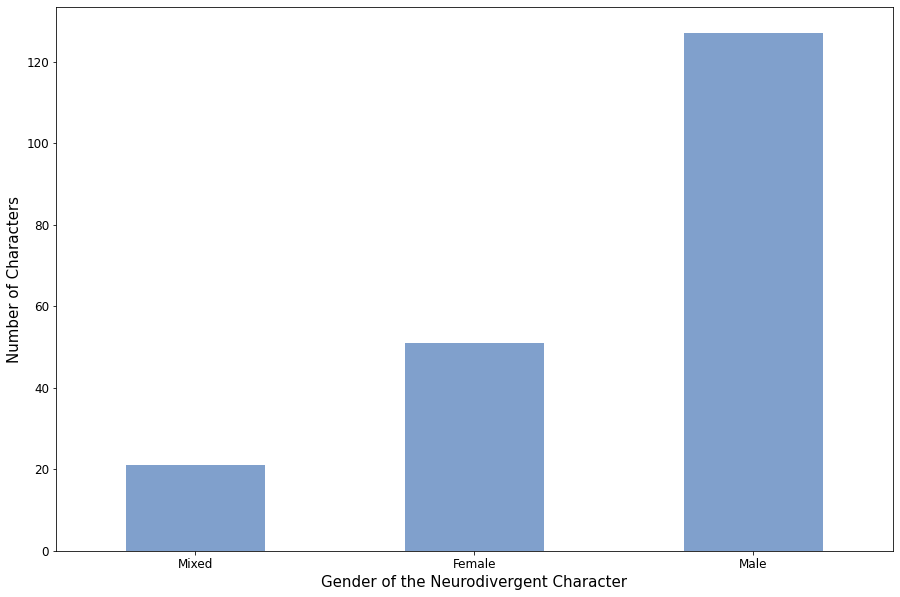

In [ ]:
# Assuming your DataFrame is called `df`
gender_counts = df['Gender of the neurodivergent character'].value_counts()
print(f"Number of female characters: {gender_counts['Female']}")
print(f"Number of male characters: {gender_counts['Male']}")
print(f"Number of mixed characters: {gender_counts['Mixed']}")

import matplotlib.pyplot as plt

# Assuming your DataFrame is called `df`
gender_counts = df['Gender of the neurodivergent character'].value_counts().sort_values(ascending=True)

# Create a bar chart of the gender distribution
fig, ax = plt.subplots(figsize=(15, 10))
gender_counts.plot.bar(ax=ax, color=["#80a0cc"])
ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# set the plot title and axis labels
ax.set_xlabel('Gender of the Neurodivergent Character', fontsize=15)
ax.set_ylabel('Number of Characters', fontsize=15)

# Show the plot
plt.show()

#save the plot to a file as a jpeg
fig.savefig('neurodivergence_movies_gender.jpeg', bbox_inches='tight', dpi=300)

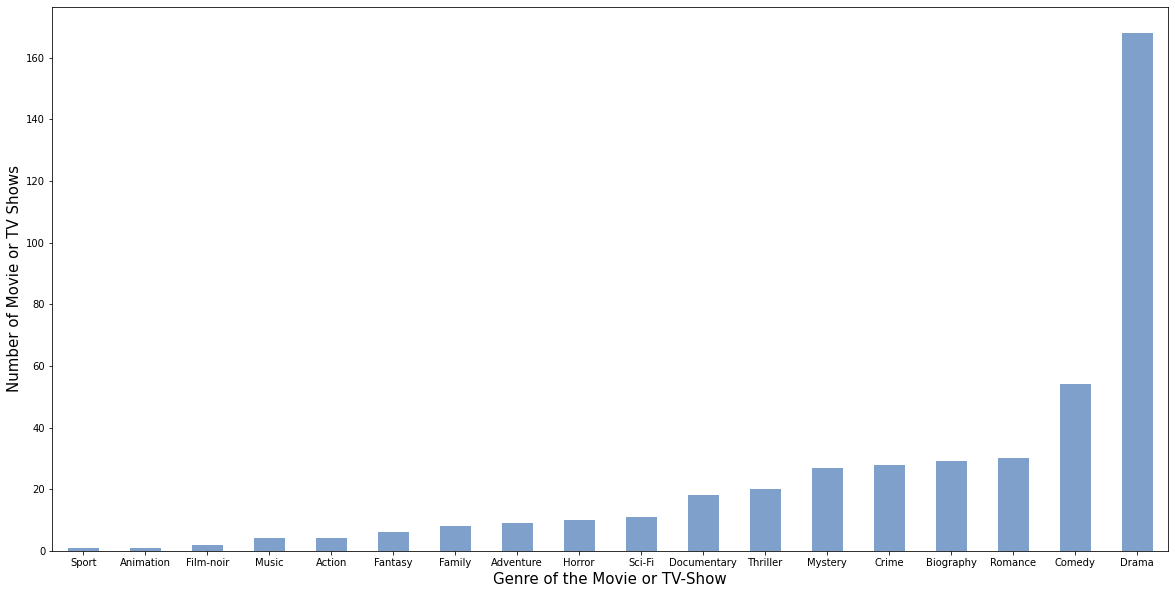

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called `df`
df_exploded = df.explode('Genre')

# Count the number of occurrences of each genre
genre_counts = df_exploded['Genre'].value_counts().sort_values(ascending=True)

# Create a bar chart of the genre distribution
fig, ax = plt.subplots(figsize=(20, 10))
genre_counts.plot.bar(ax=ax, color=["#80a0cc"])

# set the plot title and axis labels
ax.set_xlabel('Genre of the Movie or TV-Show', fontsize=15)
ax.set_ylabel('Number of Movie or TV Shows', fontsize=15)

# Set the x-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.show()


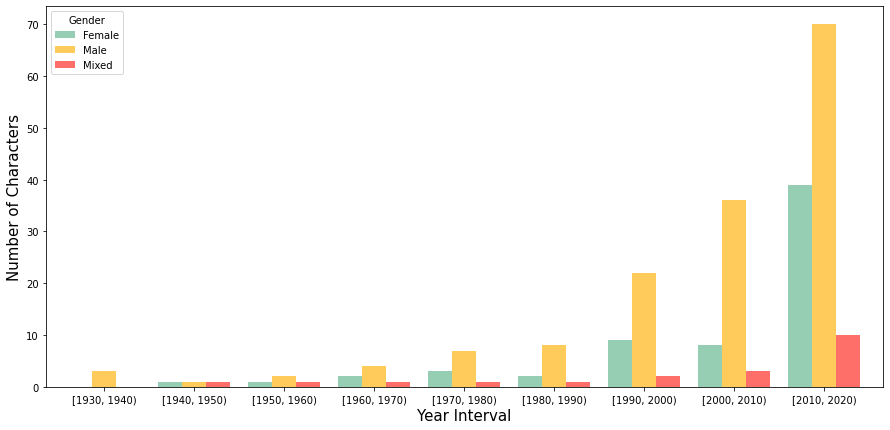

In [ ]:
# Assuming your DataFrame is called `df_expanded_years`
if df_expanded_years['Year'].dtype != int:
    df_expanded_years['Year'] = df_expanded_years['Year'].astype(int)

# Group the data by intervals of 10 years
df_expanded_years['Year Group'] = pd.cut(df_expanded_years['Year'], bins=range(1930, 2023, 10), right=False)

# Count the number of occurrences of each combination of year group and gender
gender_counts = df_expanded_years.groupby(['Year Group', 'Gender of the neurodivergent character']).size().unstack()

# Plot a bar chart for each year group
fig, ax = plt.subplots(figsize=(15, 7))
gender_counts.plot(kind='bar', ax=ax, color=["#96ceb4", "#ffcc5c", "#ff6f69"], width=0.8)

# Set the x-axis ticks and labels
ax.set_xticks(range(len(gender_counts.index)))
ax.set_xticklabels(gender_counts.index)

# Set the axis labels and title
ax.set_xlabel('Year Interval', fontsize=15)
ax.set_ylabel('Number of Characters', fontsize=15)
# Set the x-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Set the legend
ax.legend(title='Gender', loc='upper left')

# Save the plot to a file
fig.savefig('neurodivergence_movies_years_gender.jpeg', dpi=300, bbox_inches='tight')

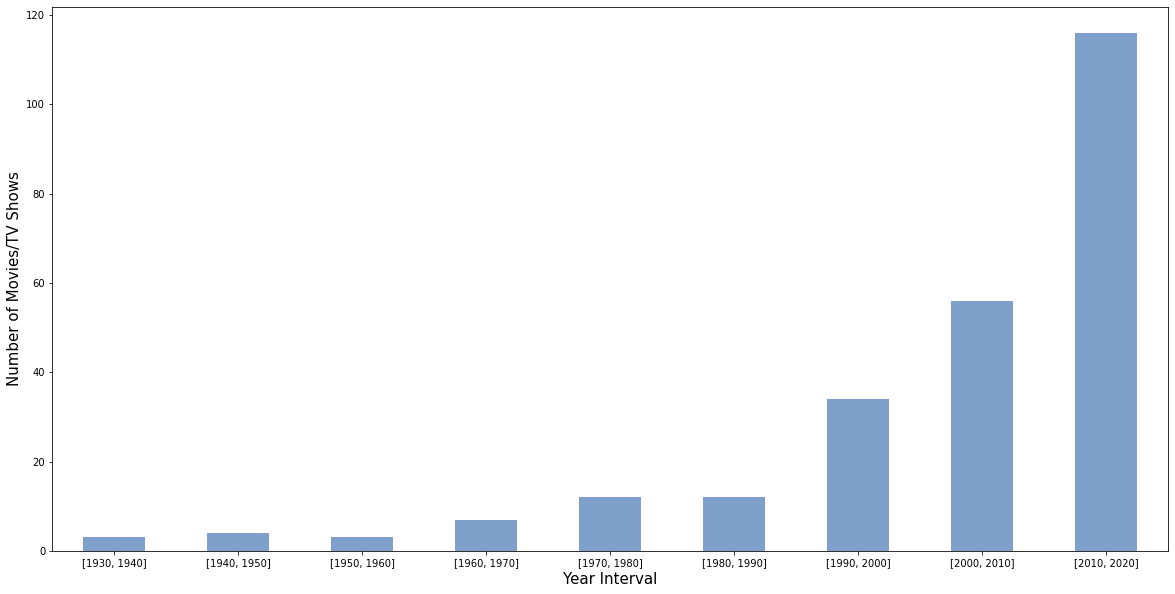

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called `df`
if df_expanded_years['Year'].dtype != int:
    df_expanded_years['Year'] = df_expanded_years['Year'].astype(int)

# Group the years into 10-year intervals
year_intervals = pd.cut(df_expanded_years['Year'], bins=range(1930, 2024, 10))

# Count the number of occurrences of each interval
interval_counts = year_intervals.value_counts().sort_index()

# Create a bar chart of the number of entities per 10-year interval
fig, ax = plt.subplots(figsize=(20, 10))
interval_counts.plot(kind='bar', ax=ax, color=["#80a0cc"])

# Set the title and axis labels
ax.set_xlabel('Year Interval', fontsize=15)
ax.set_ylabel('Number of Movies/TV Shows', fontsize=15)

# Set the x-axis labels to be horizontal
labels = [f"[{int(interval.left)}, {int(interval.right)}]" for interval in interval_counts.index]
ax.set_xticklabels(labels, rotation=0)

# Show the plot
plt.show()

#save the plot to a file as a jpeg
fig.savefig('neurodivergence_movies_years.jpeg', bbox_inches='tight', dpi=300)

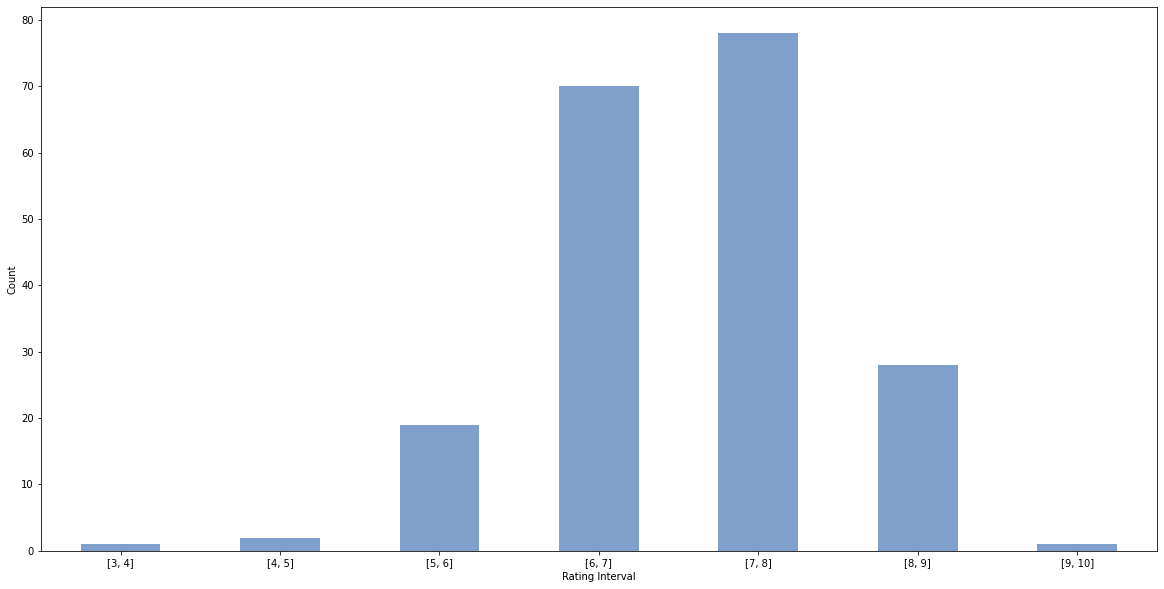

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called `df`
if df['Rating'].dtype != float:
    df['Rating'] = df['Rating'].astype(float)

# Group the ratings into intervals
rating_intervals = pd.cut(df['Rating'], bins=range(3,11,1))

# Count the number of occurrences of each interval
interval_counts = rating_intervals.value_counts().sort_index()

# Create a bar chart of the number of entities per rating interval
fig, ax = plt.subplots(figsize=(20, 10))
interval_counts.plot(kind='bar', ax=ax, color=["#80a0cc"])

# Set the title and axis labels
ax.set_xlabel('Rating Interval')
ax.set_ylabel('Count')

# Set the x-axis labels to be horizontal
labels = [f"[{int(interval.left)}, {int(interval.right)}]" for interval in interval_counts.index]
ax.set_xticklabels(labels, rotation=0)

# Show the plot
plt.show()


#save the plot to a file as a jpeg
fig.savefig('neurodivergence_movies_ratings.jpeg', bbox_inches='tight', dpi=300)

In [ ]:
# Assuming your DataFrame is called `df`
df_expanded_genres = df.explode('Genre')
df_expanded_genres = df_expanded_genres.explode('Neurodivergence Portrayed')

# Assuming your DataFrame is called `df`
def get_top_genres(group):
    return group.groupby('Genre').size().nlargest(3)

top_genres = df_expanded_genres.groupby('Neurodivergence Portrayed').apply(get_top_genres)

print(top_genres)

# Create a bar chart for each neurodivergence portrayed
# fig, axs = plt.subplots(nrows=len(top_genres), figsize=(10, 5*len(top_genres)))
# for i, (neurodivergence, genres) in enumerate(top_genres.items()):
#     print(neurodivergence, genres)
#     genres.plot(kind='bar', ax=axs[i], color=["#80a0cc"])
#     axs[i].set_title(f"Top 3 Genres for {neurodivergence}")
#     axs[i].set_xlabel('Genre')
#     axs[i].set_ylabel('Count')
#     axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)

# # Adjust the spacing between subplots
# plt.subplots_adjust(hspace=0.5)

# # Show the plot
# plt.show()

Neurodivergence Portrayed          Genre      
ADHD                               Adventure       1
                                   Comedy          1
Anorexia                           Drama           1
Autism Spectrum                    Drama          61
                                   Comedy         20
                                   Documentary    13
Bipolar Disorder                   Drama           5
                                   Comedy          2
                                   Mystery         2
Depression                         Drama           5
                                   Romance         3
                                   Biography       2
Dissociative Identity Disorder     Drama           2
                                   Biography       1
                                   Comedy          1
Down Syndrome                      Crime           1
                                   Drama           1
                                   Thriller        1

In [ ]:
# Assuming your DataFrame is called `df`
# print(df_expanded_years)
df_expanded_years = df_expanded_years.explode('Genre')
df_expanded_years = df_expanded_years.explode('Neurodivergence Portrayed')
df_expanded_years['Year'] = df_expanded_years['Year'].astype(int)
filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                (df_expanded_years['Neurodivergence Portrayed'] == 'Schizophrenia') &
                (df_expanded_years['Year'] <= 1960)]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

# Assuming your filtered DataFrame is called `unique_titles`
def get_movie_titles(group):
    return group['Movie/Show Title'].tolist()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

# print(movie_titles_gender)
print(gender_counts)


print("-------------------------------------------------------------------------------------------------")

filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                 (df_expanded_years['Neurodivergence Portrayed'] == 'Schizophrenia') &
                 ((df_expanded_years['Year'] > 1960) & (df_expanded_years['Year'] <= 1990))]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

print(movie_titles_gender)
print(gender_counts)

print("-------------------------------------------------------------------------------------------------")

filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                 (df_expanded_years['Neurodivergence Portrayed'] == 'Schizophrenia') &
                 ((df_expanded_years['Year'] > 1990) & (df_expanded_years['Year'] <= 2023))]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

print(movie_titles_gender)
print(gender_counts)
# matrice persona en pathologies en fonction du temps (3 tranches 60, 60-90, 90-nowadays),  

Crime        2
Mystery      1
Thriller     1
Drama        1
Film-noir    1
Name: Genre, dtype: int64
Male    2
Name: Gender of the neurodivergent character, dtype: int64
-------------------------------------------------------------------------------------------------
Drama       4
Horror      2
Thriller    1
Family      1
Fantasy     1
Name: Genre, dtype: int64
Gender of the neurodivergent character
Female    [Repulsion, I Never Promised You a Rose Garden]
Male                               [The Shining, Promise]
dtype: object
Female    2
Male      2
Name: Gender of the neurodivergent character, dtype: int64
-------------------------------------------------------------------------------------------------
Drama          20
Sci-Fi          9
Thriller        8
Mystery         7
Horror          4
Crime           4
Action          3
Biography       2
Comedy          2
Documentary     1
Music           1
Adventure       1
Name: Genre, dtype: int64
Gender of the neurodivergent character
Femal

In [ ]:
# Assuming your DataFrame is called `df`
# print(df_expanded_years)
df_expanded_years = df_expanded_years.explode('Genre')
df_expanded_years = df_expanded_years.explode('Neurodivergence Portrayed')
df_expanded_years['Year'] = df_expanded_years['Year'].astype(int)
filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                (df_expanded_years['Neurodivergence Portrayed'] == 'Autism Spectrum') &
                (df_expanded_years['Year'] <= 1960)]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

# Assuming your filtered DataFrame is called `unique_titles`
def get_movie_titles(group):
    return group['Movie/Show Title'].tolist()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

# print(movie_titles_gender)
print(gender_counts)


print("-------------------------------------------------------------------------------------------------")

filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                 (df_expanded_years['Neurodivergence Portrayed'] == 'Autism Spectrum') &
                 ((df_expanded_years['Year'] > 1960) & (df_expanded_years['Year'] <= 1990))]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

print(movie_titles_gender)
print(gender_counts)

print("-------------------------------------------------------------------------------------------------")

filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                 (df_expanded_years['Neurodivergence Portrayed'] == 'Autism Spectrum') &
                 ((df_expanded_years['Year'] > 1990) & (df_expanded_years['Year'] <= 2023))]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

print(movie_titles_gender)
print(gender_counts)
# matrice persona en pathologies en fonction du temps (3 tranches 60, 60-90, 90-nowadays),  

Series([], Name: Genre, dtype: int64)
Series([], Name: Gender of the neurodivergent character, dtype: int64)
-------------------------------------------------------------------------------------------------
Drama      3
Fantasy    1
Romance    1
Name: Genre, dtype: int64
Gender of the neurodivergent character
Male    [Rain Man, Son-Rise: A Miracle of Love, The Bo...
dtype: object
Male    3
Name: Gender of the neurodivergent character, dtype: int64
-------------------------------------------------------------------------------------------------
Drama          87
Crime          40
Mystery        39
Comedy         29
Documentary    13
Thriller       11
Romance         8
Biography       7
Family          4
Adventure       4
Horror          3
Sci-Fi          3
Action          1
Fantasy         1
Name: Genre, dtype: int64
Gender of the neurodivergent character
Female    [Everything’s Gonna Be Okay, The Bridge, Bones...
Male      [Keep the Change, Hannibal, Community, Sherloc...
Mixed     [As

In [ ]:
# Assuming your DataFrame is called `df`
# print(df_expanded_years)
df_expanded_years = df_expanded_years.explode('Genre')
df_expanded_years = df_expanded_years.explode('Neurodivergence Portrayed')
df_expanded_years['Year'] = df_expanded_years['Year'].astype(int)
filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                (df_expanded_years['Neurodivergence Portrayed'] == 'Emotional or Behavioral Disorders') &
                (df_expanded_years['Year'] <= 1960)]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

# Assuming your filtered DataFrame is called `unique_titles`
def get_movie_titles(group):
    return group['Movie/Show Title'].tolist()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

# print(movie_titles_gender)
print(gender_counts)


print("-------------------------------------------------------------------------------------------------")

filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                 (df_expanded_years['Neurodivergence Portrayed'] == 'Emotional or Behavioral Disorders') &
                 ((df_expanded_years['Year'] > 1960) & (df_expanded_years['Year'] <= 1990))]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

print(movie_titles_gender)
print(gender_counts)

print("-------------------------------------------------------------------------------------------------")

filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                 (df_expanded_years['Neurodivergence Portrayed'] == 'Emotional or Behavioral Disorders') &
                 ((df_expanded_years['Year'] > 1990) & (df_expanded_years['Year'] <= 2023))]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

print(movie_titles_gender)
print(gender_counts)
# matrice persona en pathologies en fonction du temps (3 tranches 60, 60-90, 90-nowadays),  

Drama        7
Biography    2
Family       2
Comedy       1
Fantasy      1
Music        1
Crime        1
Film-noir    1
Name: Genre, dtype: int64
Male      4
Mixed     2
Female    1
Name: Gender of the neurodivergent character, dtype: int64
-------------------------------------------------------------------------------------------------
Drama        9
Biography    3
Mystery      2
Comedy       1
Crime        1
Thriller     1
Romance      1
Name: Genre, dtype: int64
Gender of the neurodivergent character
Female                           [Camille Claudel, Frances]
Male      [Caretakers, Equus, One Flew over the Cuckoo's...
Mixed                      [The Dream Team, David and Lisa]
dtype: object
Male      6
Mixed     2
Female    2
Name: Gender of the neurodivergent character, dtype: int64
-------------------------------------------------------------------------------------------------
Drama          26
Comedy         17
Biography       7
Romance         7
Crime           5
Mystery       

In [ ]:
# Assuming your DataFrame is called `df`
# print(df_expanded_years)
df_expanded_years = df_expanded_years.explode('Genre')
df_expanded_years = df_expanded_years.explode('Neurodivergence Portrayed')
df_expanded_years['Year'] = df_expanded_years['Year'].astype(int)
filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                (df_expanded_years['Neurodivergence Portrayed'] == 'Intellectual Disability') &
                (df_expanded_years['Year'] <= 1960)]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

# Assuming your filtered DataFrame is called `unique_titles`
def get_movie_titles(group):
    return group['Movie/Show Title'].tolist()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

# print(movie_titles_gender)
print(gender_counts)


print("-------------------------------------------------------------------------------------------------")

filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                 (df_expanded_years['Neurodivergence Portrayed'] == 'Intellectual Disability') &
                 ((df_expanded_years['Year'] > 1960) & (df_expanded_years['Year'] <= 1990))]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

print(movie_titles_gender)
print(gender_counts)

print("-------------------------------------------------------------------------------------------------")

filtered_df = df_expanded_years[(df_expanded_years['Role'] == 'Main') &
                 (df_expanded_years['Neurodivergence Portrayed'] == 'Intellectual Disability') &
                 ((df_expanded_years['Year'] > 1990) & (df_expanded_years['Year'] <= 2023))]

# Assuming your filtered DataFrame is called `filtered_df`
unique_titles = filtered_df.drop_duplicates(subset='Movie/Show Title')
genre_counts = filtered_df['Genre'].value_counts()
gender_counts = unique_titles['Gender of the neurodivergent character'].value_counts()

movie_titles_genre = unique_titles.groupby('Genre').apply(get_movie_titles)
movie_titles_gender = unique_titles.groupby('Gender of the neurodivergent character').apply(get_movie_titles)

# print(movie_titles_genre)
print(genre_counts)

print(movie_titles_gender)
print(gender_counts)
# matrice persona en pathologies en fonction du temps (3 tranches 60, 60-90, 90-nowadays),  

Series([], Name: Genre, dtype: int64)
Series([], Name: Gender of the neurodivergent character, dtype: int64)
-------------------------------------------------------------------------------------------------
Drama      7
Comedy     2
Romance    2
Sci-Fi     1
Crime      1
Name: Genre, dtype: int64
Gender of the neurodivergent character
Male     [A Child is Waiting, Being there, Charly, Home...
Mixed                                 [Like Normal People]
dtype: object
Male     6
Mixed    1
Name: Gender of the neurodivergent character, dtype: int64
-------------------------------------------------------------------------------------------------
Drama          10
Comedy          4
Romance         3
Documentary     2
Name: Genre, dtype: int64
Gender of the neurodivergent character
Female    [Bonds of Love, Riding the Bus With My Sister,...
Male      [I am Sam, Forrest gump, Cry Havoc, Digging to...
Mixed                                   [Intelligent Lives]
dtype: object
Male      9
Female   